In [1]:
## Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import logging

import os, glob, sys
from LogUtils import load_log
from LogUtils import splitall

# set inline print
%matplotlib inline

logging.basicConfig(filename='analysis_complete.log', level=logging.INFO)

In [2]:
ltsdiff_tab = "./ltsdiff.tab"
df_diff = pd.read_csv(ltsdiff_tab, sep='|')
df_diff = df_diff.replace("\.dot\.kiss$","",regex=True)

df_diff.describe()

logging.info('ltsdiff.tab loaded: Number of entries = '+str(len(df_diff)))

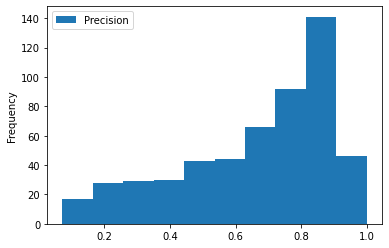

In [3]:
df_aux = df_diff

ax = df_aux.plot(y='Precision', kind = 'hist')
plt.rcParams["figure.figsize"] = (10,3)
plt.show()

In [4]:
rootdir = os.path.join("..","results","run_20210708_130230_814929500")

# lst_logs = []
# for a_dir in glob.glob(rootdir+'/*/*/*/*'):
#     _,_,_,rep,subject,sul,method = splitall(a_dir)
#     if(method in ["lstar", "l1"]):
#         a_log = os.listdir(os.path.join(rootdir, rep,subject,sul,method))[0]
#         path_log = os.path.join(rootdir,rep,subject,sul,method,a_log)
#         lst_logs.append(load_log(path_log))
#         logging.info('Loading log: '+path_log)
#     else:
#         for reused in os.listdir(os.path.join(rootdir, rep,subject,sul,method)):
#             a_log = os.listdir(os.path.join(rootdir, rep,subject,sul,method,reused))[0]
#             path_log = os.path.join(rootdir,rep,subject,sul,method,reused,a_log)
#             lst_logs.append(load_log(path_log))
#             logging.info('Loading log: '+path_log)

# lst_iters = []
# lst_subjs = []
# for i in lst_logs:
#     logging.info('Parsing log: '+",".join([str(i.Method),str(i.SUL),str(i.ReusedOT),str(i.Seed)]))
#     lst_iters.append(pd.DataFrame(i.Iterations))
#     lst_subjs.append(
#         pd.DataFrame(
#             {
#                 "Method" : [i.Method],
#                 "SUL" : [i.SUL],
#                 "ReusedOT" : [i.ReusedOT],
#                 "Seed" : [i.Seed],
#                 "Cache" : [i.Cache],
#                 "ClosingStrategy" : [i.ClosingStrategy],
#                 "ObservationTableCEXHandler" : [i.ObservationTableCEXHandler],
#                 "EquivalenceOracle" : [i.EquivalenceOracle],
#                 "Rounds" : [i.Rounds],
#                 "MQ_Resets" : [i.MQ_Resets],
#                 "MQ_Symbols" : [i.MQ_Symbols],
#                 "EQ_Resets" : [i.EQ_Resets],
#                 "EQ_Symbols" : [i.EQ_Symbols],
#                 "Learning_ms" : [i.Learning_ms],
#                 "Searching_for_CE" : [i.Searching_for_CE],
#                 "Qsize" : [i.Qsize],
#                 "Isize" : [i.Isize],
#                 "Equivalent" : [i.Equivalent],
#                 "Info" : [i.Info]
#             }
#         )
#     )

# df_iters = pd.concat(lst_iters).reset_index(drop=True)
# df_subjs = pd.concat(lst_subjs).reset_index(drop=True)

# df_iters.to_csv('stats_iter.csv', index=False)
# df_suls.to_csv( 'stats_subj.csv', index=False)

In [11]:
df_iters = pd.read_csv("stats_iter.csv")
df_iters.head(100)

,Method,SUL,ReusedOT,Seed,Round,HypothesisSize,SULSize
0,Adaptive,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss...,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss.ot,1625742157167,1,11,11
1,Adaptive,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss...,learnresult_old_500_10-15_fix.dot.kiss.ot,1625742173657,1,5,11
2,Adaptive,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss...,learnresult_old_500_10-15_fix.dot.kiss.ot,1625742173657,2,6,11
3,Adaptive,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss...,learnresult_old_500_10-15_fix.dot.kiss.ot,1625742173657,3,8,11
4,Adaptive,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss...,learnresult_old_500_10-15_fix.dot.kiss.ot,1625742173657,4,10,11
...,...,...,...,...,...,...,...
95,L*M,learnresult_old_500_10-15_fix.dot.kiss.kiss,NaN,1625742153725,3,12,22
96,L*M,learnresult_old_500_10-15_fix.dot.kiss.kiss,NaN,1625742153725,4,15,22
97,L*M,learnresult_old_500_10-15_fix.dot.kiss.kiss,NaN,1625742153725,5,17,22
98,L*M,learnresult_old_500_10-15_fix.dot.kiss.kiss,NaN,1625742153725,6,19,22


In [6]:
df_subjs = pd.read_csv("stats_subj.csv")
df_subjs.head()

,Method,SUL,ReusedOT,Seed,Round,HypothesisSize,SULSize
0,Adaptive,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss...,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss.ot,1625742157167,1,11,11
1,Adaptive,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss...,learnresult_old_500_10-15_fix.dot.kiss.ot,1625742173657,1,5,11
2,Adaptive,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss...,learnresult_old_500_10-15_fix.dot.kiss.ot,1625742173657,2,6,11
3,Adaptive,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss...,learnresult_old_500_10-15_fix.dot.kiss.ot,1625742173657,3,8,11
4,Adaptive,learnresult_new_Rand_500_10-15_MC_fix.dot.kiss...,learnresult_old_500_10-15_fix.dot.kiss.ot,1625742173657,4,10,11
...,...,...,...,...,...,...,...
95,L*M,learnresult_old_500_10-15_fix.dot.kiss.kiss,None,1625742153725,3,12,22
96,L*M,learnresult_old_500_10-15_fix.dot.kiss.kiss,None,1625742153725,4,15,22
97,L*M,learnresult_old_500_10-15_fix.dot.kiss.kiss,None,1625742153725,5,17,22
98,L*M,learnresult_old_500_10-15_fix.dot.kiss.kiss,None,1625742153725,6,19,22
